## One Hour Challenge
### Using Seaborn to Perform EDA of Pokemon Stats

I typically use R with ggplot to run my EDA and thought it would be nice to get some experience in python. With this
in mind, I pulled the Pokemon stats data available here to get some practice through a one hour project. Goals are to
perform univariate, bivariate, and multivariate visual exploration of of the data set to mine for whatever trend might 
be apparent. I've found open-ended and short time-framed projects like this really help focus on one or two specific
skills or tools. So  here we go.. 

My comments will be missing for the most part as I ran through these in a stream-of-conscious type style without concern for
documentation. Just looking to put in the hour to get a better feel of using Seaborn. <(^.^)>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

########################
# contacts epxloration #
########################

# import
df = pd.read_csv('../input/Pokemon.csv', encoding = "ISO-8859-1")

# understand df
df.shape
df.describe()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [2]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()
df.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
# drop id row
df = df.drop('#', axis = 1)
df = df.drop(['Sp. Atk', 'Sp. Def'], axis = 1)
# check for missing
df.isnull().sum()
             

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
# create feature Is two Types
def set_dual_type(row):
    if type(row['Type 2']) == str:
        return 1
    else:
        return 0
    
df['dual_type'] = df.apply(lambda row: bool(set_dual_type(row)), axis=1)       
        

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Spd')]

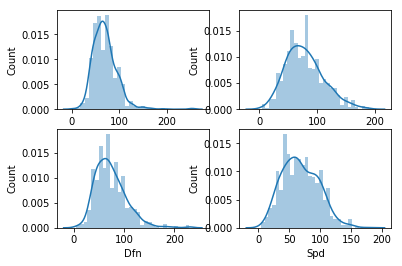

In [7]:
# Univariate Plots
fig, axes = plt.subplots(nrows=2, ncols=2)
sns.distplot(df['HP'], norm_hist=False, kde=True, bins=30, ax=axes[0,0]).set(xlabel='HP', ylabel='Count')
sns.distplot(df['Attack'], norm_hist=False, kde=True, bins=30, ax=axes[0,1]).set(xlabel='Atk', ylabel='Count')
sns.distplot(df['Defense'], norm_hist=False, kde=True, bins=30, ax=axes[1,0]).set(xlabel='Dfn', ylabel='Count')
sns.distplot(df['Speed'], norm_hist=False, kde=True, bins=30, ax=axes[1,1]).set(xlabel='Spd', ylabel='Count')



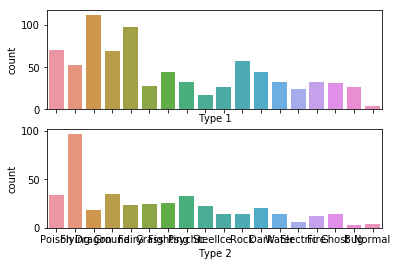

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
sns.countplot(df['Type 1'], ax=axes[0])
sns.countplot(df['Type 2'], ax = axes[1])


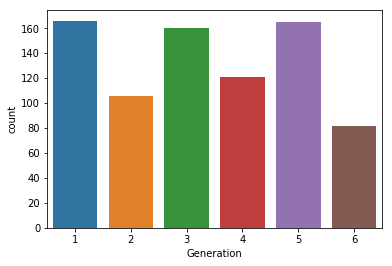

In [9]:

sns.countplot(df['Generation'])


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


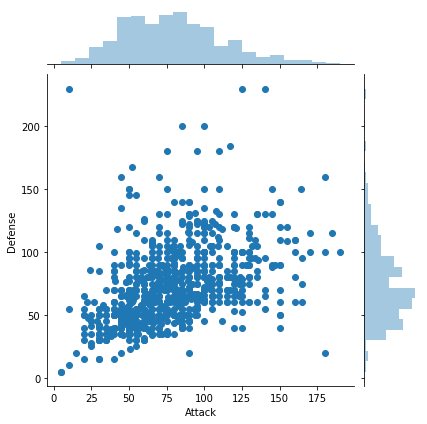

In [10]:

#bivariate plots
sns.jointplot(x='Attack', y='Defense', data=df)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


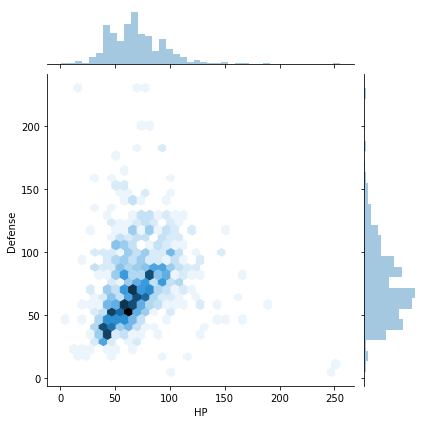

In [11]:
sns.jointplot(x='HP', y='Defense', data=df, kind = 'hex')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


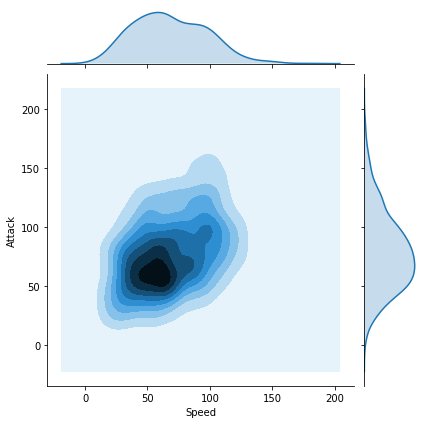

In [12]:
sns.jointplot(x='Speed', y='Attack', data=df, kind = 'kde')


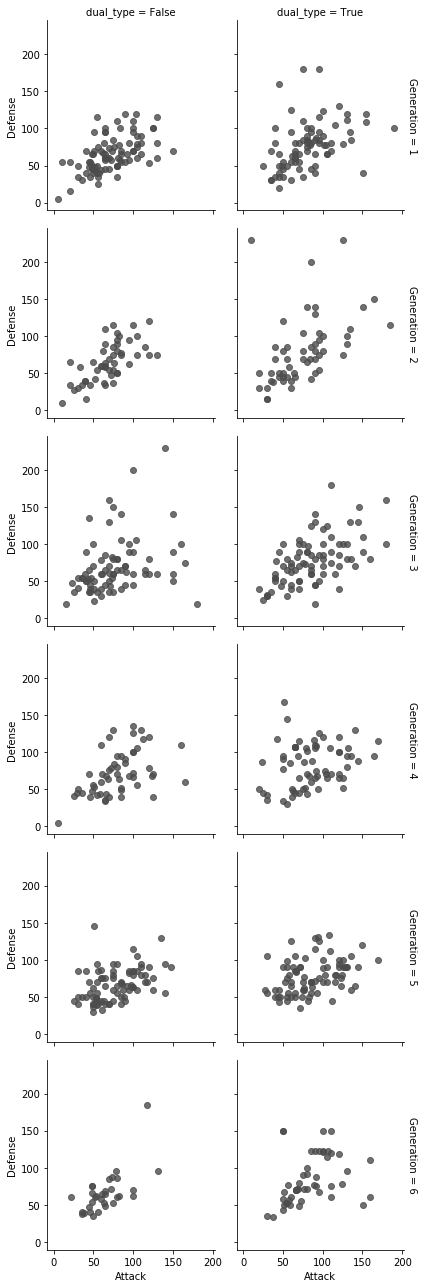

In [13]:

# facets
g = sns.FacetGrid(df, row="Generation", col="dual_type", margin_titles=True)
g.map(sns.regplot, "Attack", "Defense", color=".3", fit_reg=False, x_jitter=.1);


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


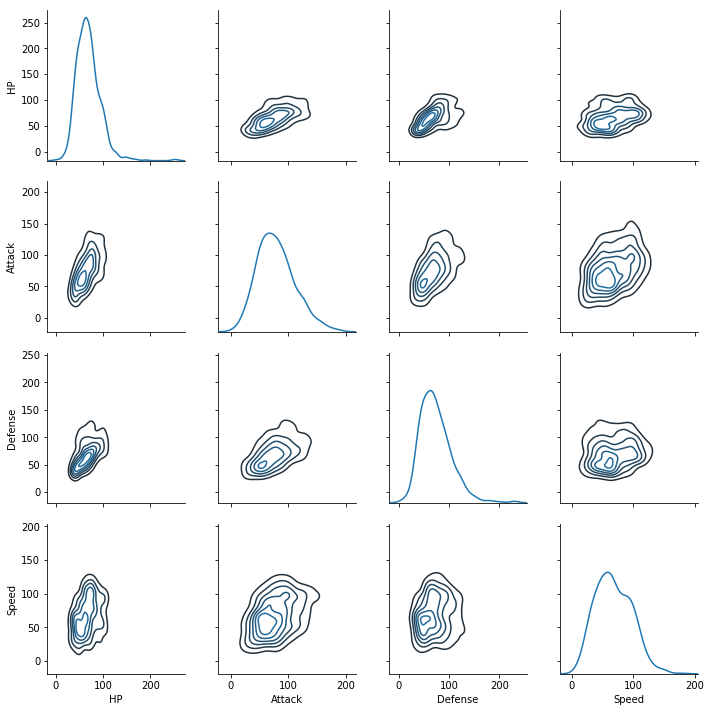

In [14]:

#pair plot
df_subset = df.drop(['Name', 'Type 1', 'Type 2', 'Total', 'Generation', 'Legendary', 'dual_type'], axis = 1)
pp = sns.PairGrid(df_subset)
pp.map_diag(sns.kdeplot)
pp.map_offdiag(sns.kdeplot, n_levels = 6)


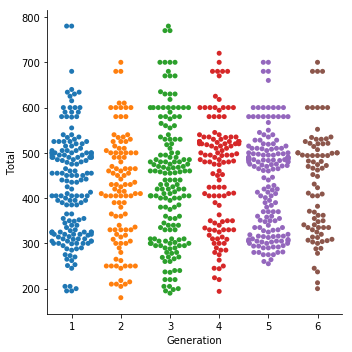

In [15]:

# categorical bivar
sns.catplot(x = 'Generation', y = 'Total', kind = 'swarm', data = df)


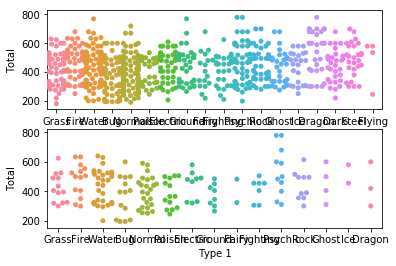

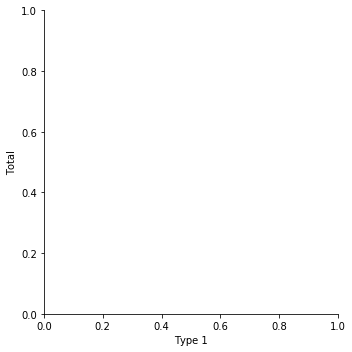

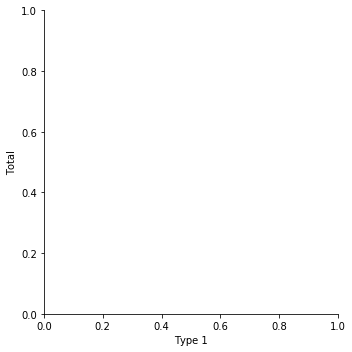

In [16]:

fig, axes = plt.subplots(nrows=2, ncols=1)
sns.catplot(x="Type 1", y = "Total", kind = 'swarm', data = df, ax = axes[0])
sns.catplot(x="Type 1", y="Total", kind="swarm",
            data=df.query("Generation == 1"), ax=axes[1]);


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


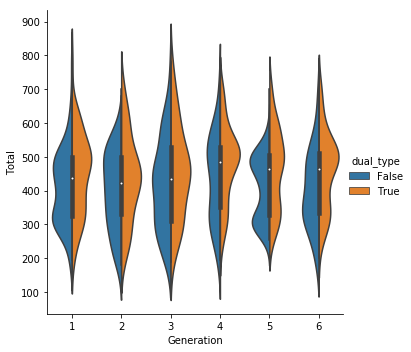

In [17]:

      
# Multivariate plots
sns.catplot(x = "Generation", y = "Total", hue = "dual_type", kind = 'violin', split = True, data = df)


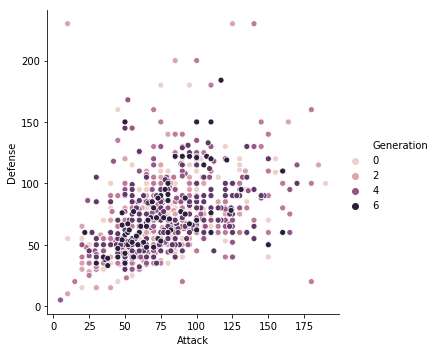

In [18]:

sns.relplot(x="Attack", y="Defense", hue="Generation", data=df);


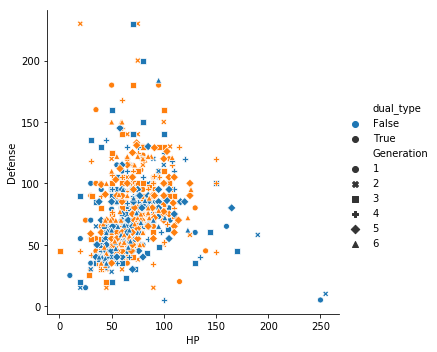

In [19]:

sns.relplot(x="HP", y="Defense", hue="dual_type", style="Generation", data=df)


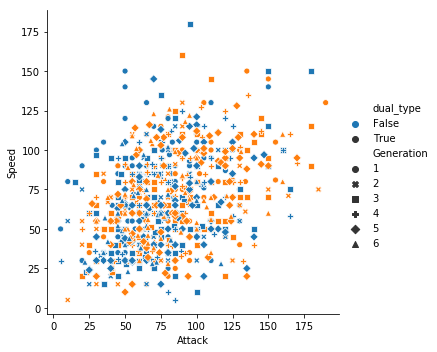

In [20]:
sns.relplot(x="Attack", y="Speed", hue="dual_type", style="Generation", data=df)


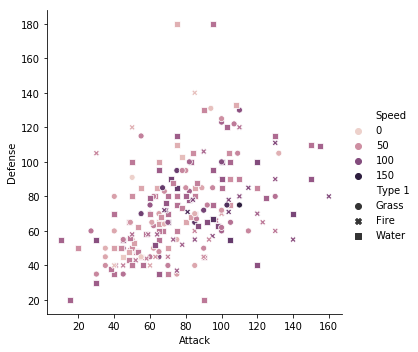

In [21]:

query_types = ['Grass', 'Fire', 'Water']
sns.relplot(x="Attack", y="Defense", hue="Speed", style = "Type 1", data=df[df['Type 1'].isin(query_types)])


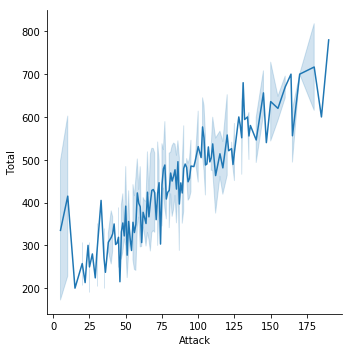

In [22]:

sns.relplot(x="Attack", y="Total", kind="line", ci="sd", data=df)


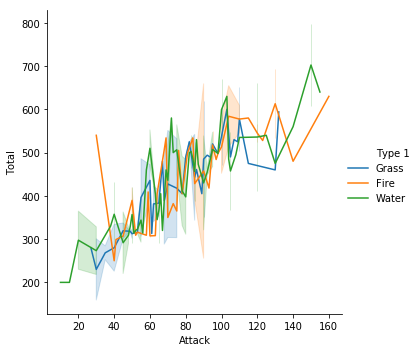

In [23]:

sns.relplot(x="Attack", y="Total", kind="line", hue = "Type 1", ci="sd", data=df[df['Type 1'].isin(query_types)])